In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
pd.reset_option('^display.', silent=True)

In [2]:
data =  pd.read_csv('adult.data')
data

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
data.columns = ['age','work_class','fnlwgt','education','education-num',
              'marital-status','occupation','relationship','race',
              'sex','capital-gain','capital-loss','hours-per-week',
              'native_country','income']

data.columns



Index(['age', 'work_class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
df =  data[['work_class','education','occupation','race','sex','hours-per-week','income']]
df.columns

In [11]:
data = data[data.work_class != ' ?']
data = data[data.occupation != ' ?']
data = data[data.native_country != ' ?']
data

,age,work_class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
data = data.replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov'
                 , ' Without-pay', ' Never-worked'],[1,2,3,4,5,6,7,8])


In [27]:
data = data.replace([' Bachelors', ' Some-college', ' 11th', ' HS-grad', ' Prof-school', ' Assoc-acdm',
                 ' Assoc-voc', ' 9th', ' 7th-8th', ' 12th', ' Masters', ' 1st-4th', ' 10th', ' Doctorate', 
                 ' 5th-6th', ' Preschool'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [28]:
data = data.replace([' Married-civ-spouse', ' Divorced', ' Never-married', ' Separated', ' Widowed', ' Married-spouse-absent', 
                 ' Married-AF-spouse'],[1,2,3,4,5,6,7])


In [29]:
data = data.replace([' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', 
                 ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving',
                 ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14])


In [30]:
data = data.replace([' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried'],[1,2,3,4,5,6])

In [31]:
data = data.replace([' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black']
                ,[1,2,3,4,5])

In [32]:
data = data.replace([' Female', ' Male']
                ,[1,2])

In [35]:
data = data.replace([' >50K', ' <=50K']
                ,[0,1])

In [36]:
data

,age,work_class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,50,2,83311,1,13,1,5,3,1,2,0,0,13,United-States,1
1,38,1,215646,4,9,2,7,4,1,2,0,0,40,United-States,1
2,53,1,234721,3,7,1,7,3,5,2,0,0,40,United-States,1
3,28,1,338409,1,13,1,6,1,5,1,0,0,40,Cuba,1
4,37,1,284582,11,14,1,5,1,1,1,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,6,12,1,1,1,1,1,0,0,38,United-States,1
32556,40,1,154374,4,9,1,8,3,1,2,0,0,40,United-States,0
32557,58,1,151910,4,9,5,9,6,1,1,0,0,40,United-States,1
32558,22,1,201490,4,9,3,9,2,1,2,0,0,20,United-States,1


In [44]:
df =  data[['age','work_class','education','marital-status','occupation','relationship','race','sex','capital-gain'
            ,'capital-loss' ,'hours-per-week','income']]
df.columns

Index(['age', 'work_class', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df.corr()
#print('pearson correlation = \n', corr_mat, sep='')


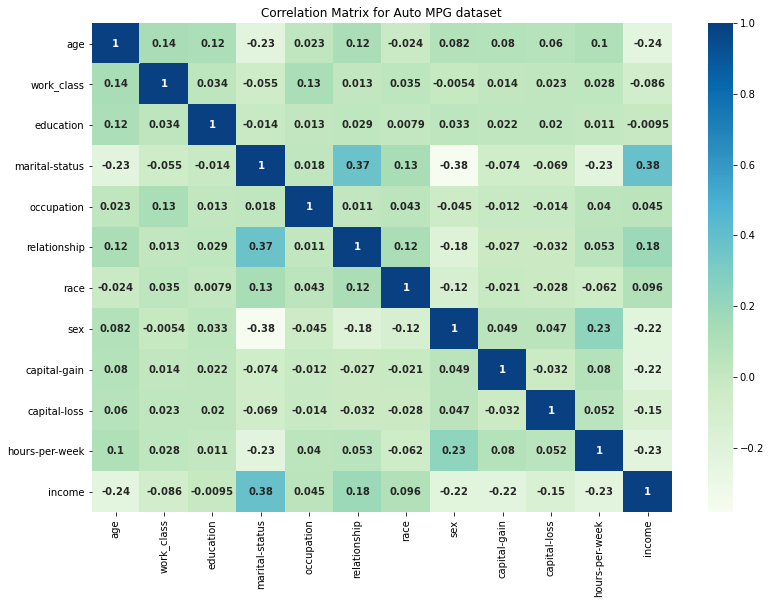

In [46]:
plt.figure(figsize=(13,9))
ax = sns.heatmap(data=corr_mat, annot=True,
            cmap='GnBu', annot_kws={"weight": "bold"})
plt.title('Correlation Matrix for Auto MPG dataset')
plt.show()
